# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Alfiandi
- **Email:** m322d4ky1732@bangkit.academy
- **ID Dicoding:** alfiandi21

## 1. Menentukan Pertanyaan Bisnis

- Is there a significant change in PM2.5 in each month?
- Is there a relationship between NO2 and CO?
- How PM2.5 compares to PM10 each year?

## 2. Import Semua Packages/Library yang Digunakan

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data Wrangling

### a. Gathering Data

In [85]:
df_shunyi = pd.read_csv("Data_Shunyi_Alfin.csv")
df_shunyi = df_shunyi.drop(columns = 'No') #Drop column "No" because it's not important
df_shunyi

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


### b. Assessing Data

#### - Check data info

In [86]:
df_shunyi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   day      35064 non-null  int64  
 3   hour     35064 non-null  int64  
 4   PM2.5    34151 non-null  float64
 5   PM10     34516 non-null  float64
 6   SO2      33768 non-null  float64
 7   NO2      33699 non-null  float64
 8   CO       32886 non-null  float64
 9   O3       33575 non-null  float64
 10  TEMP     35013 non-null  float64
 11  PRES     35013 non-null  float64
 12  DEWP     35010 non-null  float64
 13  RAIN     35013 non-null  float64
 14  wd       34581 non-null  object 
 15  WSPM     35020 non-null  float64
 16  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.5+ MB


#### - Describe data

In [87]:
df_shunyi.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


#### - Check for missing values

In [88]:
df_shunyi.isnull().sum()

year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

#### - Check for data duplication

In [89]:
df_shunyi.duplicated().sum()

0

#### - Outlier check

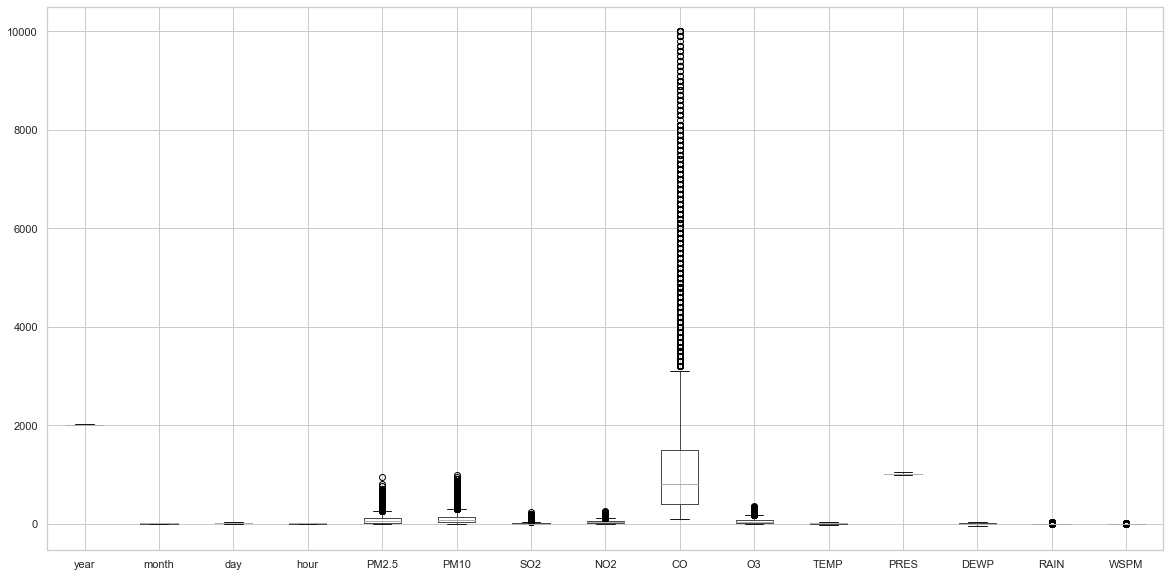

In [90]:
plt.figure(figsize=(20, 10))
df_shunyi.boxplot()
plt.show()

### c. Cleaning Data

#### - Cleaning missing values

In [91]:
df_shunyi.interpolate(method='linear', limit_direction='forward', inplace=True)

In [92]:
df_shunyi.wd.value_counts()

NNE    4540
N      3877
NE     3351
SSE    2963
SE     2665
S      2613
NW     2446
WNW    2051
NNW    1656
SSW    1586
ENE    1416
ESE    1377
W      1177
E      1153
SW      973
WSW     737
Name: wd, dtype: int64

In [93]:
df_shunyi.fillna(value="NNE", inplace=True)

In [94]:
df_shunyi.isnull().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## 4. Exploratory Data Analysis (EDA)

### a. Explore Statistical Parameters from Data

In [95]:
df_shunyi.describe(include="all")

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNE,NaN,Shunyi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023,NaN,35064
mean,2014.662560,6.522930,15.729637,11.500000,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810,13.375531,1013.071937,2.450821,0.061010,NaN,1.807784,NaN
std,1.177213,3.448752,8.800218,6.922285,81.500282,90.579040,19.463506,30.907747,1162.920922,54.592684,11.484913,10.177512,13.732520,0.761118,NaN,1.287542,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,NaN,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,3.000000,1004.700000,-8.900000,0.000000,NaN,1.000000,NaN
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,900.000000,42.000000,14.400000,1012.800000,3.100000,0.000000,NaN,1.500000,NaN
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,139.000000,16.000000,62.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,NaN,2.300000,NaN


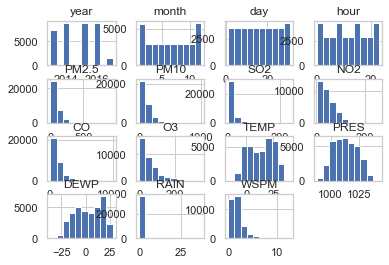

In [96]:
df_shunyi.hist()
plt.show()

               year         month           day          hour     PM2.5  \
year   1.000000e+00 -2.020099e-01 -5.569082e-03  1.164482e-15 -0.004380   
month -2.020099e-01  1.000000e+00  1.052232e-02  4.724770e-16 -0.024280   
day   -5.569082e-03  1.052232e-02  1.000000e+00 -4.489555e-17 -0.001568   
hour   1.164482e-15  4.724770e-16 -4.489555e-17  1.000000e+00  0.010034   
PM2.5 -4.380167e-03 -2.427952e-02 -1.568318e-03  1.003429e-02  1.000000   
PM10  -3.335047e-02 -3.908602e-02  2.209151e-02  5.388592e-02  0.889705   
SO2   -9.134905e-02 -2.194468e-01  7.457635e-03  6.742879e-02  0.461935   
NO2    2.407229e-02 -4.818981e-03  3.065060e-02  9.754437e-02  0.635951   
CO     8.085169e-03  4.323678e-02 -1.812365e-02 -8.265248e-03  0.776079   
O3    -4.234733e-02 -1.140781e-01  9.140508e-03  2.897967e-01 -0.126368   
TEMP  -1.551966e-01  1.324535e-01  1.463592e-02  1.420081e-01 -0.120102   
PRES   1.871516e-01 -5.162836e-02  2.878247e-02 -3.980559e-02  0.002149   
DEWP  -1.628650e-01  2.61

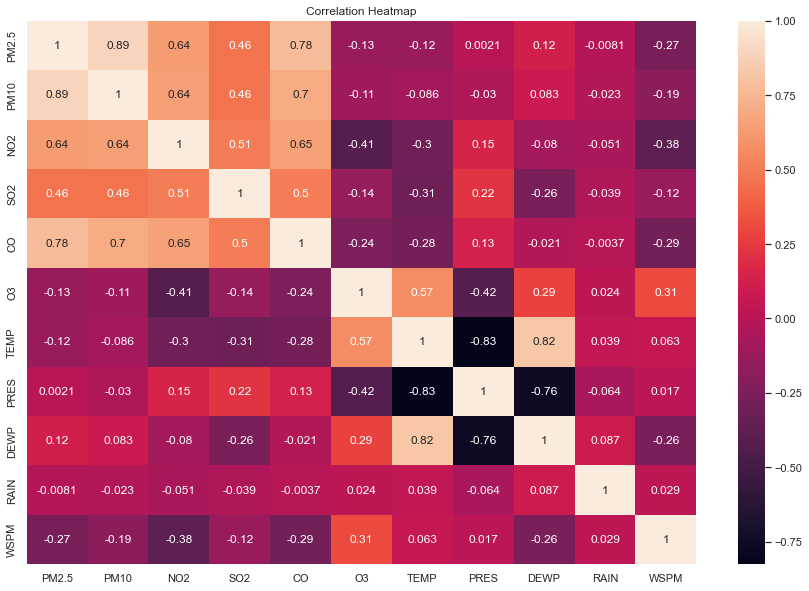

In [97]:
df_shunyi.corr()
print(df_shunyi.corr())

# Correlation heatmap of some variables
corr = df_shunyi[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

## 5. Visualization & Explanatory Analysis

### Pertanyaan 1: Is there a significant change in PM2.5 in each month?

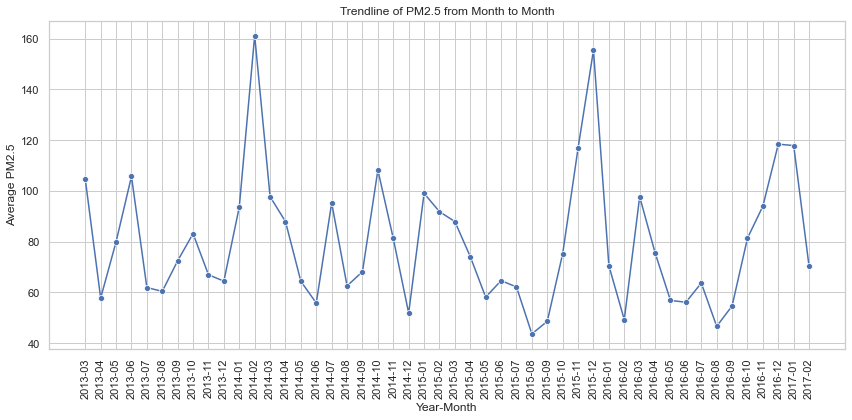

In [98]:
# Merge year and month columns into a new column
df_shunyi['year_month'] = df_shunyi['year'].astype(str) + '-' + df_shunyi['month'].astype(str).str.zfill(2)

# Calculating monthly average PM2.5
pm25_monthly = df_shunyi.groupby('year_month')['PM2.5'].mean().reset_index()

# Membuat plot trendline PM2.5 dari bulan ke bulan
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_monthly, x='year_month', y='PM2.5', marker='o', color='b')
plt.xlabel('Year-Month')
plt.ylabel('Average PM2.5')
plt.title('Trendline of PM2.5 from Month to Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Is there a relationship between NO2 and CO?

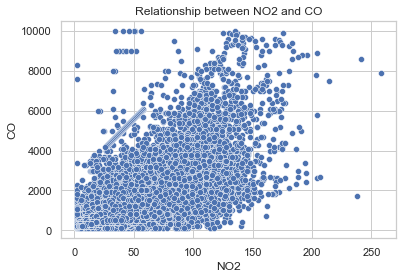

0.6536694622686754
There is a strong positive correlation between NO2 and CO.


In [99]:
# Relationship between NO2 and CO
plt.title('Relationship between NO2 and CO')
sns.scatterplot(x='NO2', y='CO', data=df_shunyi)
plt.xlabel('NO2')
plt.ylabel('CO')
plt.show()

# Correlation test between NO2 and CO
correlation = df_shunyi['NO2'].corr(df_shunyi['CO'])
print(correlation)

if correlation > 0.5:
    print("There is a strong positive correlation between NO2 and CO.")
elif correlation < -0.5:
    print("There is a strong negative correlation between NO2 and CO.")
else:
    print("There is no strong correlation between NO2 and CO.")


### Pertanyaan 3: How PM2.5 compares to PM10 each year?

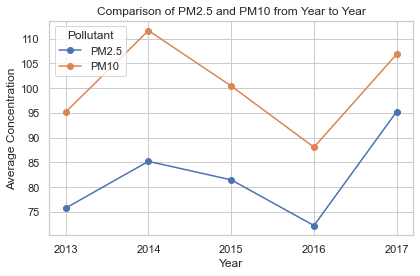

In [101]:
# Calculating the average PM2.5 and PM10 for each year
pm_yearly = df_shunyi.groupby('year')[['PM2.5', 'PM10']].mean()

# Comparison of PM2.5 and PM10 from Year to Year
pm_yearly.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average Concentration')
plt.title('Comparison of PM2.5 and PM10 from Year to Year')
plt.xticks(pm_yearly.index)
plt.grid(True)
plt.legend(title='Pollutant', loc='upper left')
plt.tight_layout()
plt.show()


## 6. Conclusion

- Is there a significant change in PM2.5 in each month?
>There are changes or fluctuations in the PM2.5 number every month, where the highest value was in February 2014 and the lowest value was in August 2015.
    
- Is there a relationship between NO2 and CO?
>Based on the scatter plot, there is a strong positive relationship between NO2 and CO, meaning that an increase in NO2 occurs together with an increase in CO. This is also evidenced by the correlation value of 0.65, which is close to 1.
    
- How PM2.5 compares to PM10 each year?
>PM10 values are always higher than PM2.5 values every year.